In [1]:
import rasterio
import rasterio.plot
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


In [3]:
src.meta
# width: row, height: column, count: band

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [4]:
src.crs
# Coordinate Reference System (CRS) of the raster

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [5]:
src.res
# Resolution (pixel size) of the raster

(90.0, 89.99579177642138)

In [6]:
src.count
# Number of bands in the raster

1

In [7]:
src.width, src.height
# Width and height of the raster in pixels

(4269, 3113)

In [8]:
src.bounds
# Bounding box of the raster in the CRS coordinates (extent of the raster)

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

In [9]:
src.dtypes
# Data type of the raster values

('int16',)

In [10]:
src.transform
# Affine transformation matrix for the raster

Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)

## Meaning of the transformation matrix (Important)
The transformation matrix consists of six parameters that control the scaling, translation, and rotation of the raster. Most rasters will have no rotation (`b`, `d` are 0), but the transformation will include the pixel size (`a`, `e`) and the geographic coordinates of the top-left pixel (`c`, `f`).

- `a`: width of a pixel in the x-direction
- `b`: row rotation (typically zero)
- `c`: x-coordinate of the upper-left corner of the upper-left pixel
- `d`: column rotation (typically zero)
- `e`: height of a pixel in the y-direction (typically negative)
- `f`: y-coordinate of the of the upper-left corner of the upper-left pixel

`a` and `e` are the pixel width and height, respectively, and `c` and `f` are the coordinates of the upper-left corner of the raster. The other coefficients are used for rotation and shearing.

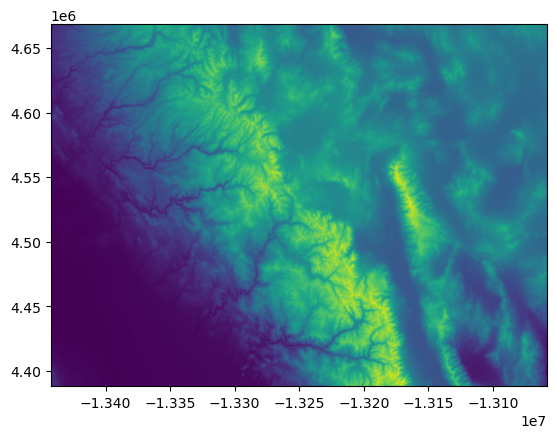

<Axes: >

In [11]:
rasterio.plot.show(src)

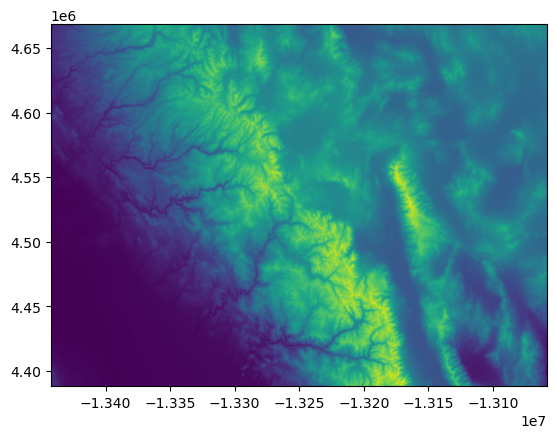

<Axes: >

In [12]:
rasterio.plot.show((src, 1))

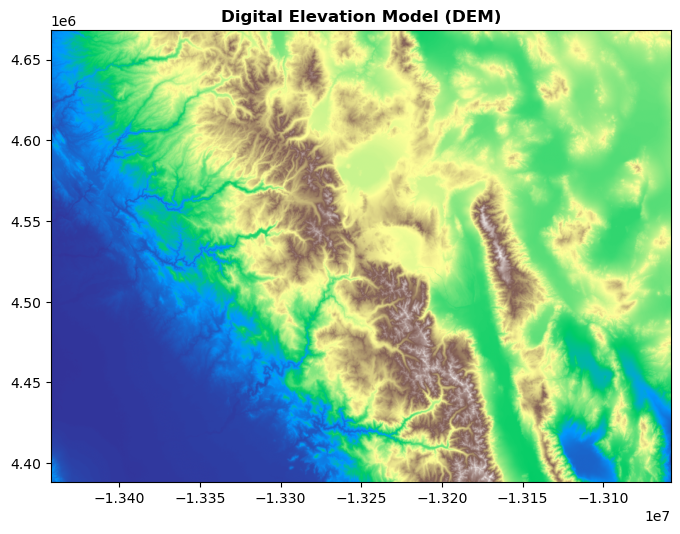

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()

In [14]:
dem_bounds = (
    "https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson"
)
gdf = gpd.read_file(dem_bounds)
gdf = gdf.to_crs(src.crs)

<Axes: title={'center': 'Digital Elevation Model (DEM)'}>

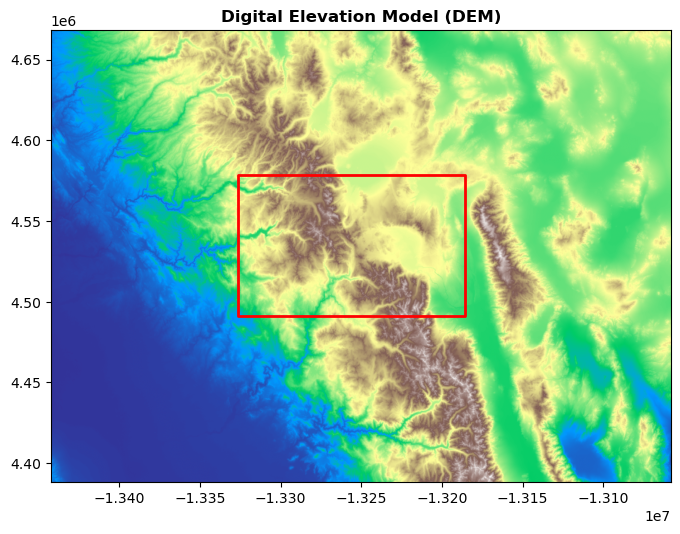

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
gdf.plot(ax=ax, edgecolor="red", facecolor="none", lw=2)

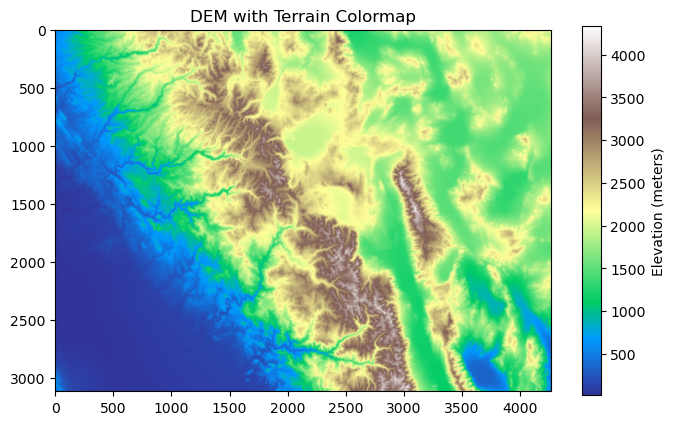

In [17]:
elev_band = src.read(1)
plt.figure(figsize=(8, 8))
plt.imshow(elev_band, cmap="terrain")
plt.colorbar(label="Elevation (meters)", shrink=0.6)
plt.title("DEM with Terrain Colormap")
plt.show()
# `plt.imshow` displays the raster data as an image, using the terrain colormap for elevation visualization.
# `rasterio.plot.show` is more suitable for displaying raster data with additional metadata and context with geospatial information

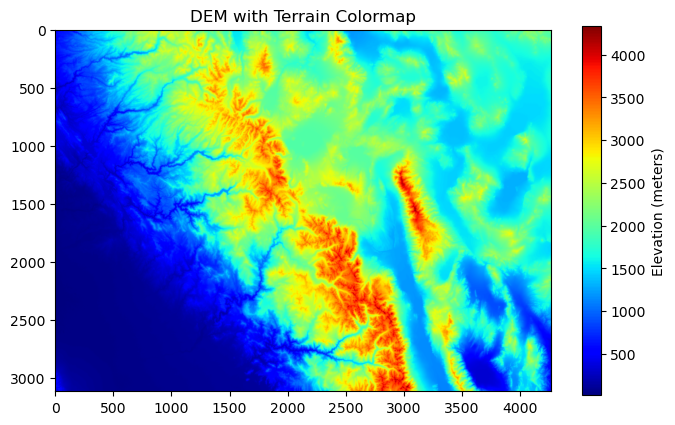

In [18]:
elev_band = src.read(1)
plt.figure(figsize=(8, 8))
plt.imshow(elev_band, cmap="jet")
plt.colorbar(label="Elevation (meters)", shrink=0.6)
plt.title("DEM with Terrain Colormap")
plt.show()

In [19]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


In [20]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -inf,
 'width': 2485,
 'height': 2563,
 'count': 7,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'),
 'transform': Affine(90.0, 0.0, 582390.0,
        0.0, -90.0, 4105620.0)}

In [21]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

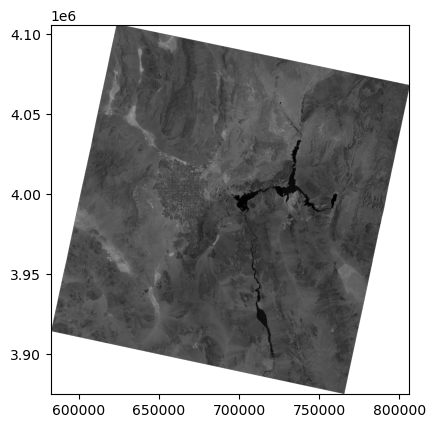

<Axes: >

In [22]:
rasterio.plot.show((src, 5), cmap="Greys_r")

| Name   | Wavelength       | Description                                        |
|--------|------------------|----------------------------------------------------|
| SR_B1  | 0.435-0.451 μm   | Band 1 (ultra blue, coastal aerosol) surface reflectance |
| SR_B2  | 0.452-0.512 μm   | Band 2 (blue) surface reflectance                   |
| SR_B3  | 0.533-0.590 μm   | Band 3 (green) surface reflectance                  |
| SR_B4  | 0.636-0.673 μm   | Band 4 (red) surface reflectance                    |
| SR_B5  | 0.851-0.879 μm   | Band 5 (near infrared) surface reflectance          |
| SR_B6  | 1.566-1.651 μm   | Band 6 (shortwave infrared 1) surface reflectance   |
| SR_B7  | 2.107-2.294 μm   | Band 7 (shortwave infrared 2) surface reflectance   |

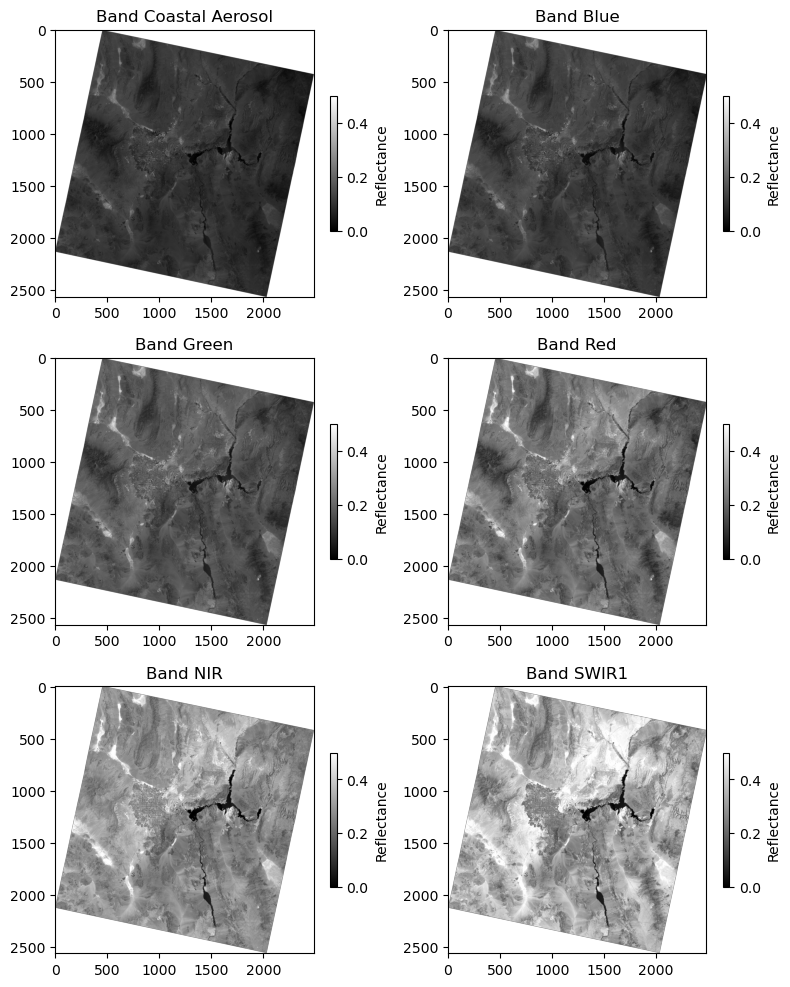

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src.count):
    data = src.read(band)
    ax = axes[band - 1]
    im = ax.imshow(data, cmap="gray", vmin=0, vmax=0.5)
    ax.set_title(f"Band {band_names[band - 1]}")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()

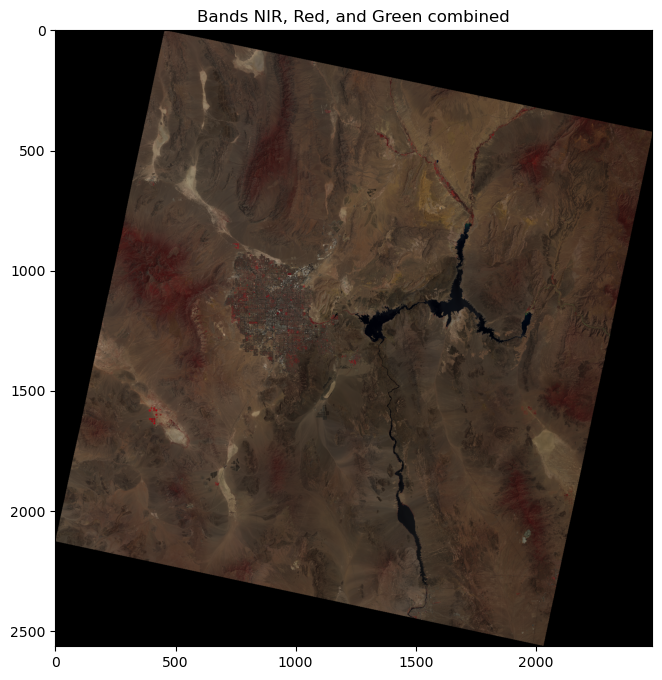

In [24]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)

# Stack the bands into a single array
rgb = np.dstack((nir_band, red_band, green_band)).clip(0, 1)

# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Bands NIR, Red, and Green combined")
plt.show()